## Problem Statement

Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and 
k mean clustering(scree plot or elbow curve) and obtain  optimum number of clusters and check whether we have obtained same 
number of clusters with the original data 
(class column we have ignored at the begining who shows it has 3 clusters)

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import silhouette_score

import scipy.cluster.hierarchy as sch

In [3]:
df = pd.read_csv('wine.csv')
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [6]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [5]:
df.Type.value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

<AxesSubplot:>

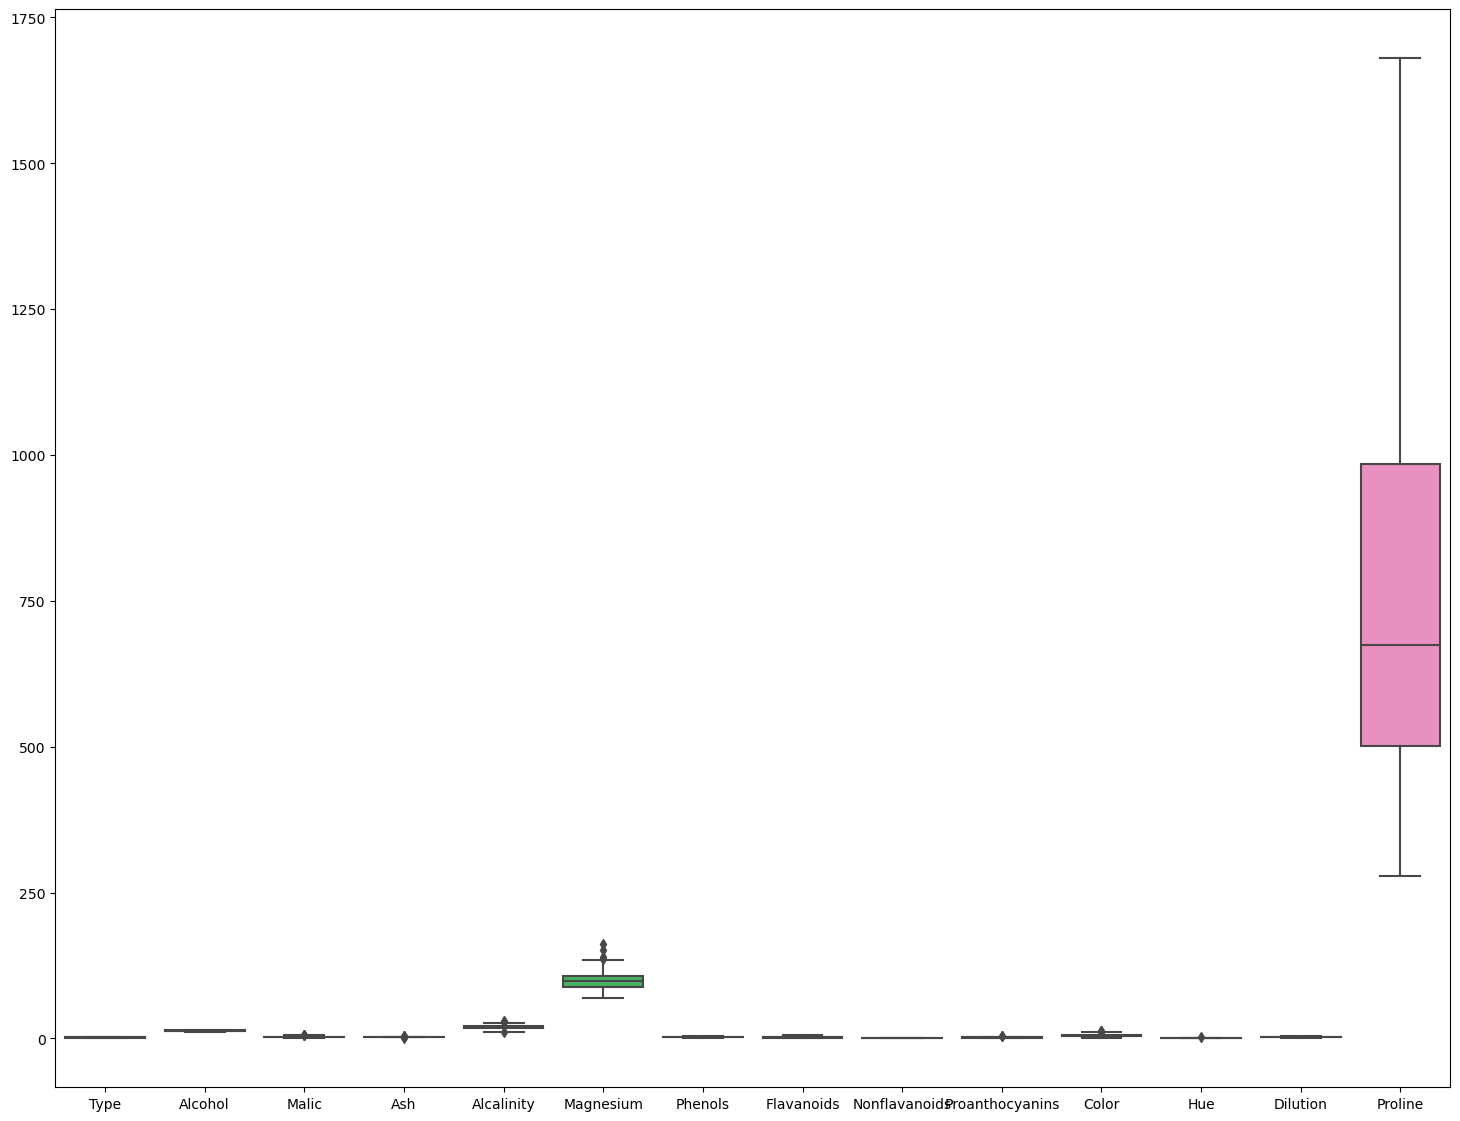

In [18]:
plt.figure(figsize=(18,14))
sns.boxplot(data = df)

In [19]:
X = df.drop('Type', axis = 1 )
y = df.Type

In [20]:
scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [21]:
X_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [23]:
# Applying the Kmeans clustering 
no_of_clusters=[2,3,4,5,6,7,8,9,10]
for num in no_of_clusters:
    kmeans= KMeans(n_clusters= num, random_state= 42)
    clus_label= kmeans.fit_predict(X_scaled)
    sil_score=silhouette_score(X_scaled, clus_label)
    print(f"For {num} of clusters, sil score is {sil_score}")

For 2 of clusters, sil score is 0.26831340971052126
For 3 of clusters, sil score is 0.2848589191898987
For 4 of clusters, sil score is 0.25173343011696475
For 5 of clusters, sil score is 0.2271732547624458
For 6 of clusters, sil score is 0.19582485390848947
For 7 of clusters, sil score is 0.20913005310687274
For 8 of clusters, sil score is 0.13581656516941268
For 9 of clusters, sil score is 0.14576057110571292
For 10 of clusters, sil score is 0.13394527355239233


In [24]:
# Plotting the elbow curve to find optimum number of clusters
wcss= []
for i in range (2,11):
    kmeans1= KMeans(n_clusters=i, random_state=42).fit(X_scaled)
    wcss.append(kmeans1.inertia_)

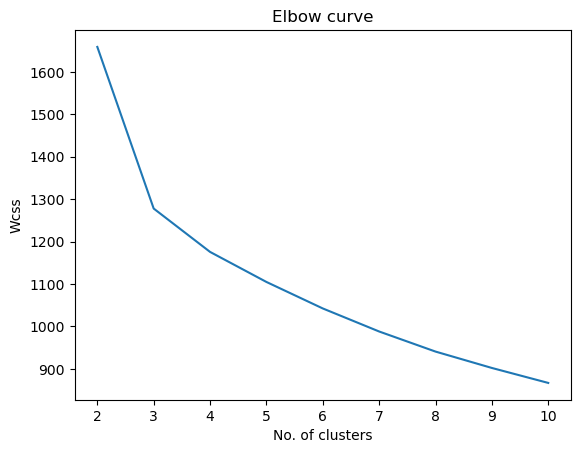

In [25]:
plt.plot(range(2,11),wcss)
plt.xlabel("No. of clusters")
plt.ylabel("Wcss")
plt.title("Elbow curve")
plt.show()

from Elbow curve and silhouette Score, we can see that optimum number of clusters are 3

In [27]:
kmeans=KMeans(n_clusters=3, random_state=42)
cl=kmeans.fit_predict(X_scaled)
cl

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

<AxesSubplot:xlabel='cl', ylabel='count'>

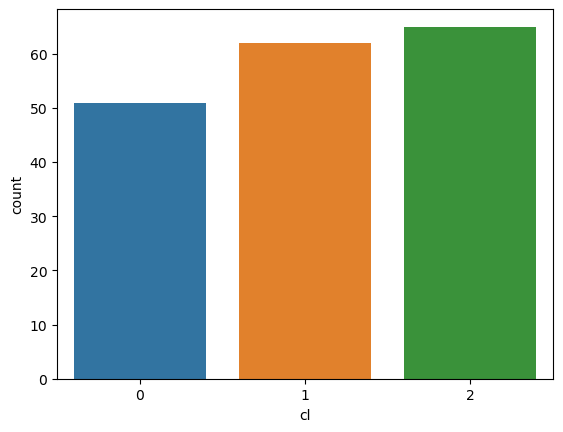

In [28]:
df4=df.copy()
df4["cl"]=cl
sns.countplot(x="cl", data=df4)

In [29]:
df4.cl.value_counts()

2    65
1    62
0    51
Name: cl, dtype: int64

In [30]:
# Applying PCA on scaled data

pca= PCA(n_components=8, random_state=42)
pca_df=pca.fit_transform(X_scaled)

In [31]:
np.cumsum(pca.explained_variance_ratio_)*100

array([36.1988481 , 55.40633836, 66.52996889, 73.59899908, 80.16229276,
       85.09811607, 89.3367954 , 92.01754435])

In [32]:
pca.explained_variance_

array([4.73243698, 2.51108093, 1.45424187, 0.92416587, 0.85804868,
       0.64528221, 0.55414147, 0.35046627])

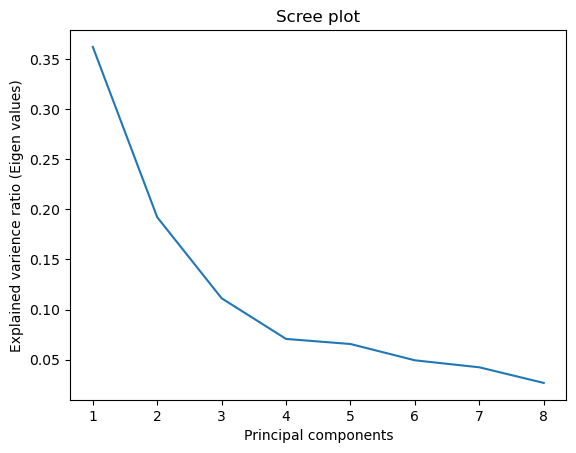

In [33]:
# scree plot
pc_values= np.arange(pca.n_components_)+1
plt.plot(pc_values, pca.explained_variance_ratio_)
plt.title("Scree plot")
plt.xlabel("Principal components")
plt.ylabel("Explained varience ratio (Eigen values)")
plt.show()

from scree plot it an be seen that 3 principal componets can be selected

In [34]:
pca1= PCA(n_components=3, random_state=42)
pca3_df= pca1.fit_transform(X_scaled)
pca3_df=pd.DataFrame(pca3_df)
pca3_df.columns= ["PC1", "PC2", "PC3"]
pca3_df

,PC1,PC2,PC3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


In [35]:
# Plotting the elbow curve to find optimum number of clusters

wcss1= []
for i in range (2,11):
    kmeans2= KMeans(n_clusters=i, random_state=42).fit(pca3_df)
    wcss1.append(kmeans2.inertia_)

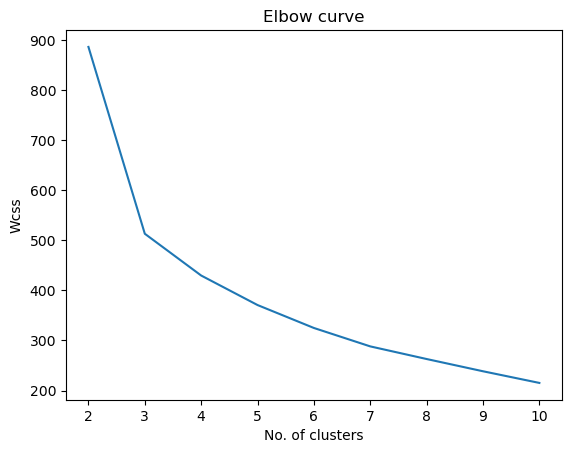

In [36]:
plt.plot(range(2,11),wcss1)
plt.xlabel("No. of clusters")
plt.ylabel("Wcss")
plt.title("Elbow curve")
plt.show()

In [37]:
kmeans3= KMeans(n_clusters=3, random_state=42)
clust_lables= kmeans3.fit_predict(pca3_df)
clust_lables

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [38]:
df3=df.copy()

In [39]:
df3["Clust_lables"]= clust_lables
df3.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clust_lables
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [40]:
df3.Clust_lables.value_counts()

2    65
1    62
0    51
Name: Clust_lables, dtype: int64

<AxesSubplot:xlabel='Clust_lables', ylabel='count'>

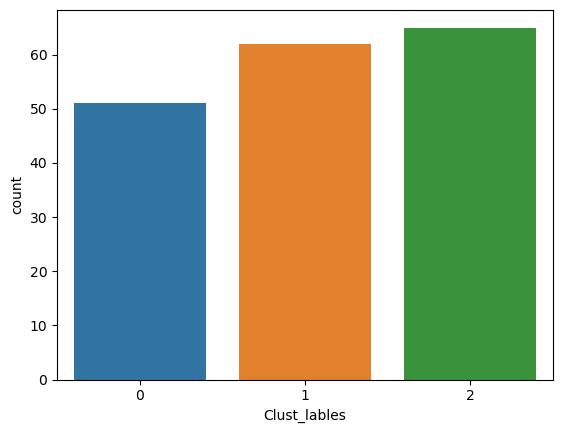

In [41]:
sns.countplot(x="Clust_lables", data=df3)

In [42]:
silcore= silhouette_score(pca3_df, clust_lables)
silcore

0.4537999848257617

In [43]:
df4=pd.concat([df3, pca3_df], axis=1)
df4.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clust_lables,PC1,PC2,PC3
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1,3.316751,-1.443463,-0.165739
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,2.209465,0.333393,-2.026457
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,2.516740,-1.031151,0.982819
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,3.757066,-2.756372,-0.176192
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,1.008908,-0.869831,2.026688


<AxesSubplot:xlabel='PC2', ylabel='PC1'>

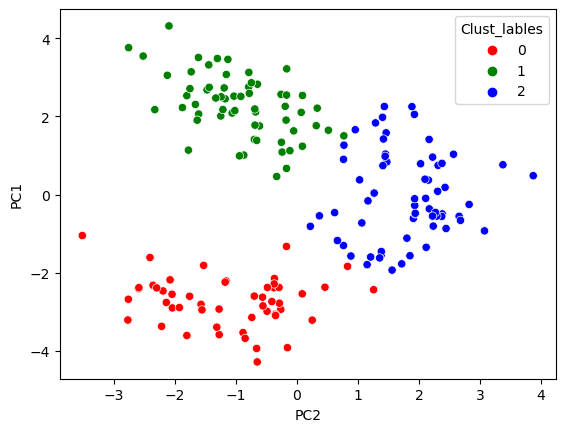

In [44]:
sns.scatterplot(x="PC2", y="PC1", data=df4, hue= "Clust_lables", palette=["r", "g", "b"])

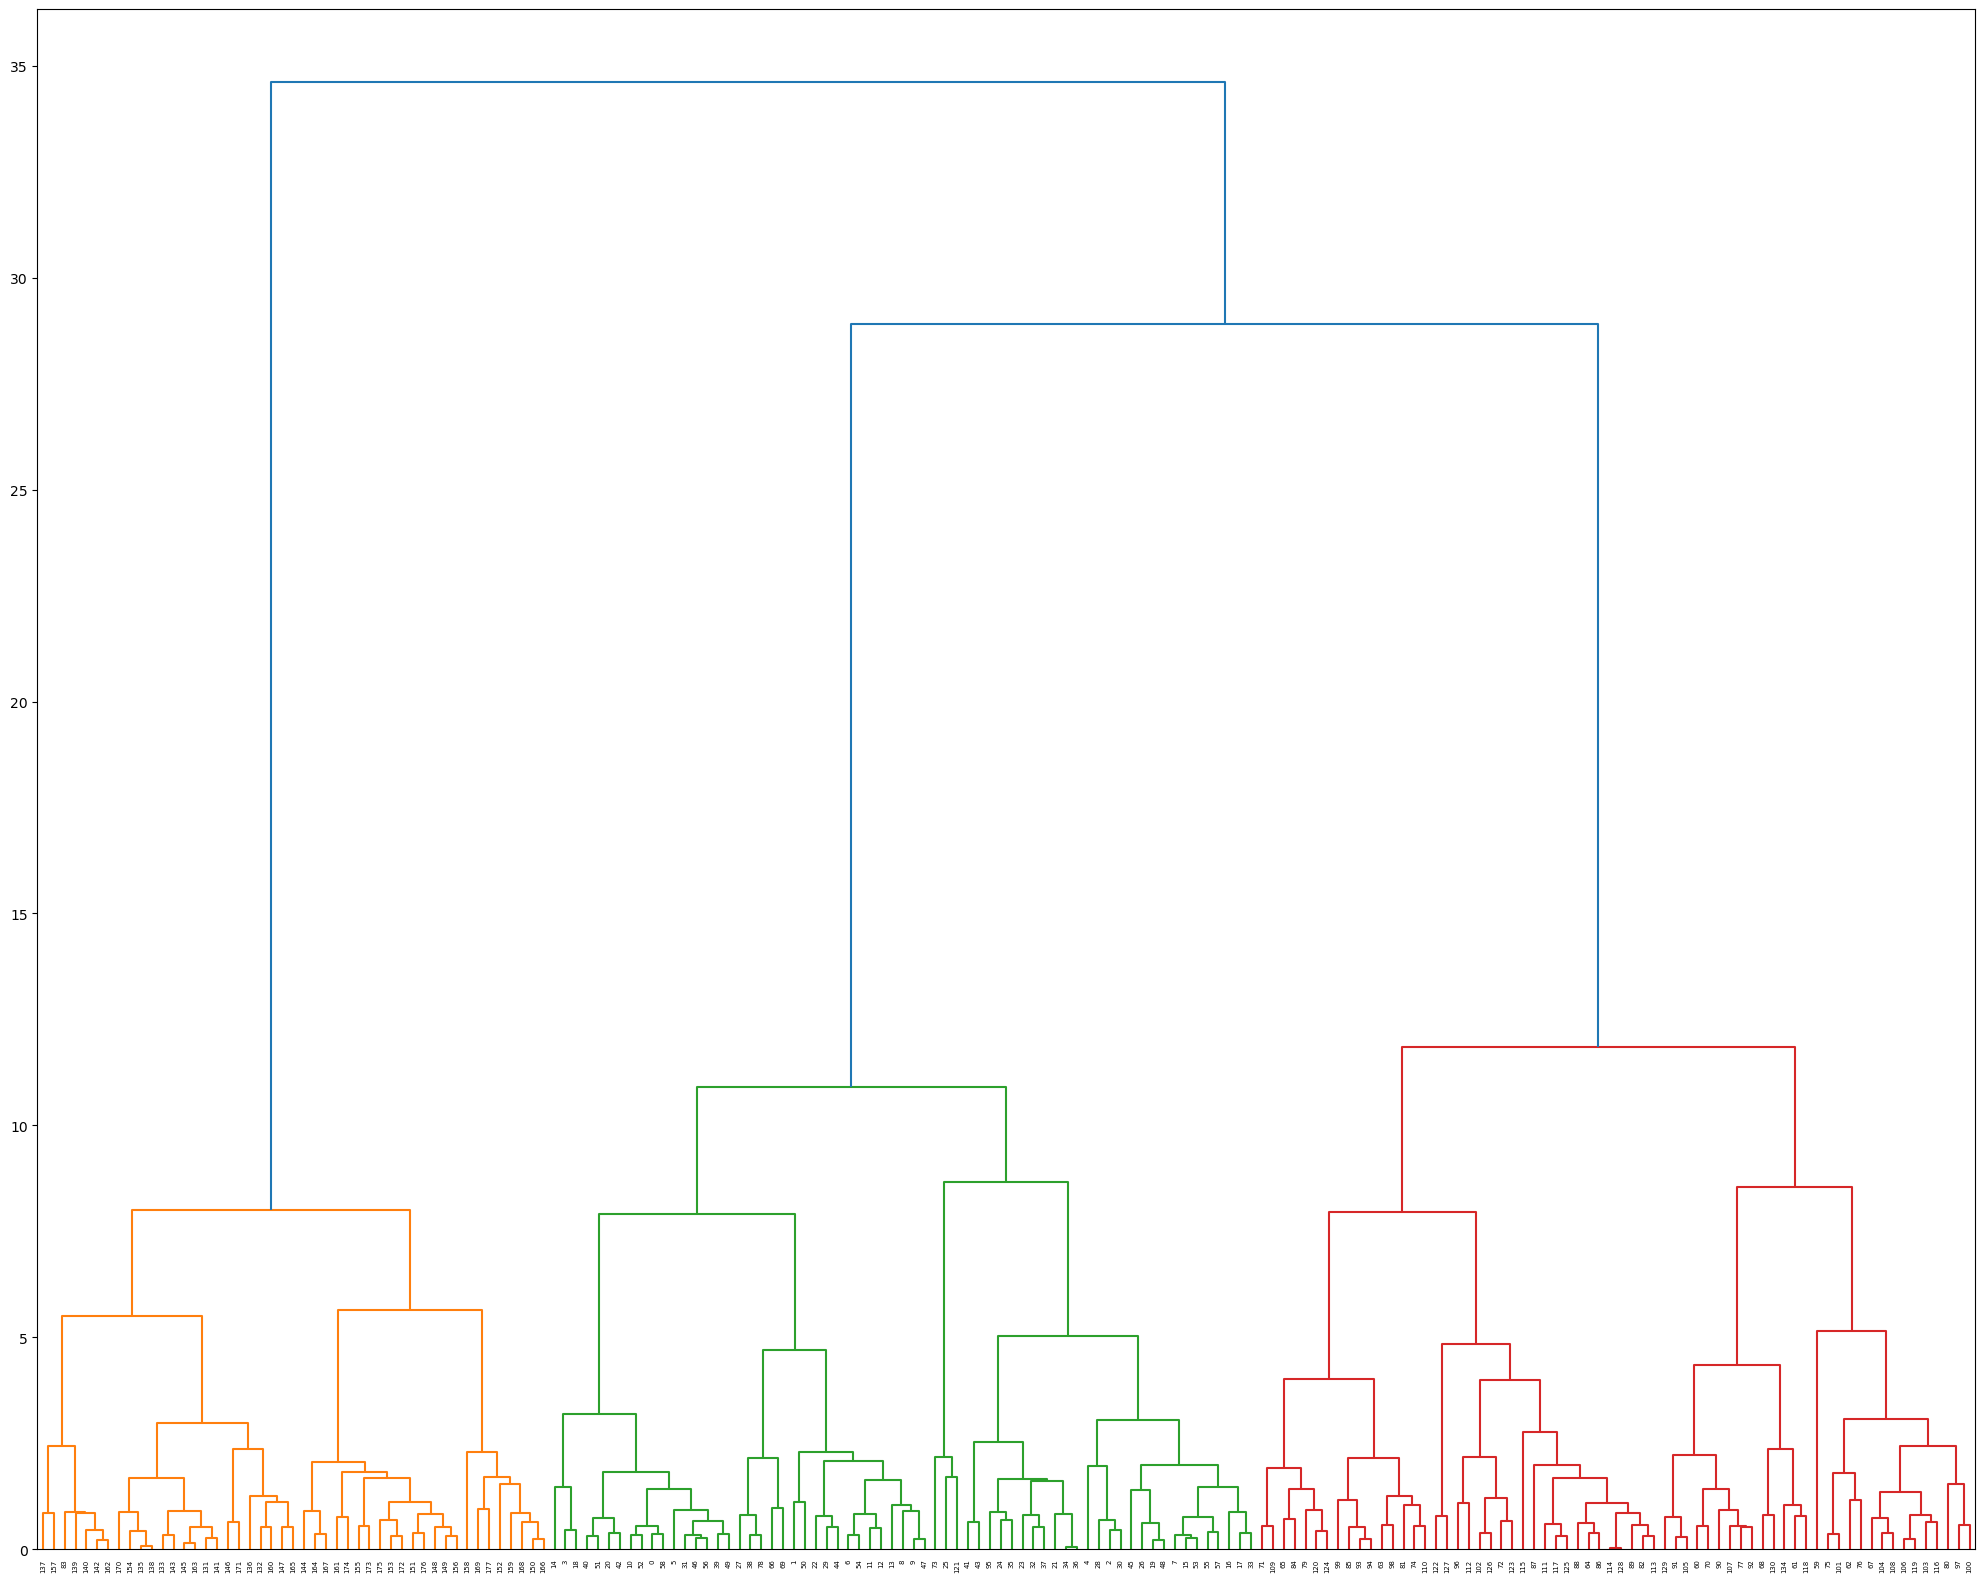

In [45]:
# Using heirarchical clustering on PCA data with 3 components

plt.figure(figsize=(25,20))
den= sch.dendrogram(sch.linkage(pca3_df, "ward"))

In [46]:
cluster= AgglomerativeClustering(n_clusters=3, linkage="ward")
clust_he= cluster.fit_predict(pca3_df)
clust_he

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [47]:
df5=df.copy()
df5["lables"]= clust_he

<AxesSubplot:xlabel='lables', ylabel='count'>

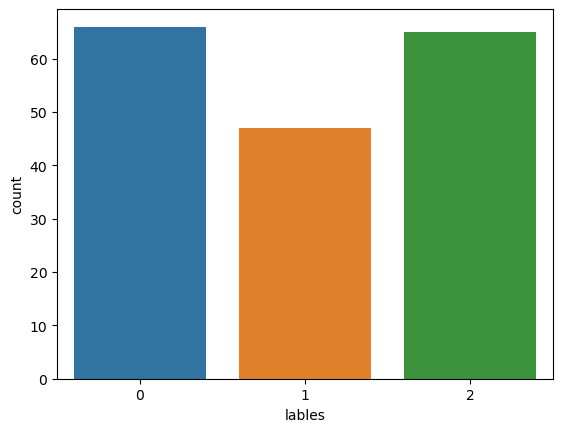

In [48]:
sns.countplot(x="lables", data=df5)

In [49]:
df5.lables.value_counts()

0    66
2    65
1    47
Name: lables, dtype: int64

In [50]:
df6= pd.concat([df5, pca3_df], axis=1)
df6.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,lables,PC1,PC2,PC3
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2,3.316751,-1.443463,-0.165739
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2,2.209465,0.333393,-2.026457
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2,2.516740,-1.031151,0.982819
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2,3.757066,-2.756372,-0.176192
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2,1.008908,-0.869831,2.026688


<AxesSubplot:xlabel='PC2', ylabel='PC1'>

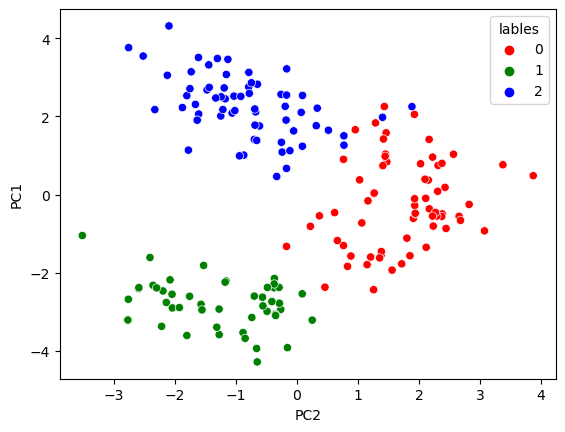

In [51]:
sns.scatterplot(x="PC2", y="PC1", data= df6, hue="lables" , palette=["r", "g", "b"])